# Support Vector Machine

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics
from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import os
import sklearn
import seaborn as sns
import pickle
import itertools
import numpy as np 
import nltk
import string
import pandas as pd
import re

df = pd.read_csv(os.getcwd()+'\CleanData.csv', encoding = 'utf-8')

df.head()

,ID,Title,Publication,Author,Published,Year,Month,Category,URL,Content,Label
0,50314,WhatsNewsBusinessFinance,WSJ,Journalist,01/02/18,2018,1,Whats News Business Finance,https://www.wsj.com/articles/whats-news-busine...,The unemployment rate in some metro areas stan...,Real
1,60334,ABrowserYouveNeverHeardofIsDethroningGoogleinAsia,WSJ,"NewleyPurnell,NewleyPurnellWsjCom",01/01/18,2018,1,Tech,https://www.wsj.com/articles/a-browser-youve-n...,JAKARTA IndonesiaA mobile browser rarely used ...,Real
2,92197,MarkedSafestYearinCommercialAviationHistory,WSJ,"AndyPasztor,AndyPasztorWsjCom",01/02/18,2018,1,U.S.,https://www.wsj.com/articles/2017-marked-safes...,The global airline industry achieved a previou...,Real
3,83175,FiveThingstoKnowAbouttheIranianProtests,WSJ,"FarnazFassihi,FarnazFassihiWsjCom",12/31/17,2017,12,World,https://www.wsj.com/articles/economics-dissati...,Protests erupted across Iran for a third day o...,Real
4,41508,PhotosoftheDayJan,WSJ,Journalist,01/01/18,2018,1,None,https://www.wsj.com/articles/photos-of-the-day...,Photos of the Day Jan Children warm up by a fi...,Real


#### Label Encoder

In [6]:
Content = df['Content'].values 

Labels = df['Label'].values

print(Labels)

le = LabelEncoder()
le.fit(Labels)
Labels = le.transform(Labels)

print(Labels)

X_train, X_test, y_train, y_test = train_test_split(Content, Labels, test_size=0.33, random_state=53)

['Real' 'Real' 'Real' ... 'Fake' 'Fake' 'Fake']
[1 1 1 ... 0 0 0]


#### Stemming and setting stopwords

In [7]:
import nltk
from nltk.corpus import stopwords 

porter_stemmer = nltk.stem.porter.PorterStemmer()

#spilts the sentences into words
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

stop_words = set(stopwords.words('english')) 

#### CountVectorizer

In [8]:
count_vectorizer = CountVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)
#testing the implementation
con = df['Content'].loc[1]
con = [con]

vect = count_vectorizer.fit(con)
print(vect)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Get the feature names of `count_vectorizer` 
# print(count_vectorizer.get_feature_names()[30:])


C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
 

CountVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function porter_tokenizer at 0x000001782EC6AD08>,
        vocabulary=None)


#### TfIDFVectorizer

In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)

# # Fit and transform the training data 
# tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# # Transform the test set 
# tfidf_test = tfidf_vectorizer.transform(X_test)

#testing the implementation
tfcon = df['Content'].loc[1]
tfcon = [tfcon]

tfvect = tfidf_vectorizer.fit(con)
print(tfvect)

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get the feature names of `count_vectorizer` 
# print(tfidf_vectorizer.get_feature_names()[30:])


C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
 

TfidfVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function porter_tokenizer at 0x000001782EC6AD08>,
        use_idf=True, vocabulary=None)


In [10]:
# Confusion Matrix
import matplotlib as mp

def evaluation(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    #Calculating precision
    def Precision_Cal(TP,FP):
        return TP/(TP+FP)

    #Calculating recall
    def Recall_Cal(TP,FN):
        return TP/(TP+FN)

    #Calculating F1 score
    def F1_Cal(precision,recall):
        f1 = 2*((precision * recall)/(precision+recall))
        print('F1 Score = ', f1)
        print('F1 % = ', f1*100)

    #Calculating Error Rate
    def Err_Cal(TP,FP,FN,TN):
        return ((FP+FN)/(TP+FP+FN+TN))

    precision = Precision_Cal(TP,FP)
    print('Precision = ', precision)

    recall = Recall_Cal(TP,FN)
    print('Recall = ', recall)

    F1_Cal(precision,recall)

    Err_Rate = Err_Cal(TP,FP,FN,TN)
    print('Error Rate = ', Err_Rate)

    #Accuracy is 1-error rate
    print('Accuracy = ', 1-Err_Rate)
    
def rocCurve(y_true, y_pred, roc):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
def plotConfusionMatrix(cm):
    np.set_printoptions(suppress=True)
    mp.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
                cbar=False,
                annot=True, 
                square=True,
                fmt='d',
                yticklabels=['fake','real'],
                xticklabels=['fake','real'],
                cmap='Blues'
                )
    plt.title('Confusion matrix - Validation dataset')
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig('confmat_valid.eps', dpi=300)
    plt.show()


#### Training the model with countvectors 

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


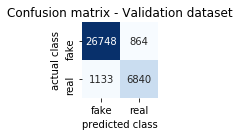

Precision =  0.9687092568448501
Recall =  0.9593630070657437
F1 Score =  0.9640134791775539
F1 % =  96.40134791775539
Error Rate =  0.05611915132780666
Accuracy =  0.9438808486721934
ROC-AUC 0.9133023269048031


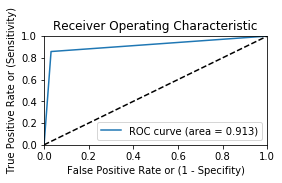

In [11]:
#our model to be used
clf1 = svm.LinearSVC() 

clf1.fit(count_train, y_train)                       # Fit SVM classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)
print("ROC-AUC", roc_auc)


#### Training the model with tfidf Vectors

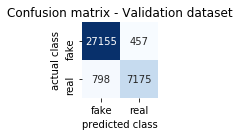

Precision =  0.9834492249746487
Recall =  0.9714520802776089
F1 Score =  0.9774138396472599
F1 % =  97.741383964726
Error Rate =  0.035267668961641144
Accuracy =  0.9647323310383589
ROC-AUC 0.9416807143310469


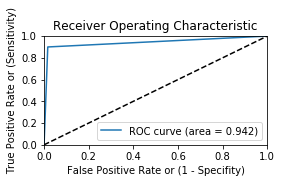

In [12]:
#our model to be used
clf2 = svm.LinearSVC()

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit SVM classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')

#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

### Inference

###### The ROC Curve with tfidf vectorization is higher which is 0.94 hence gives an accurate prediction

We predicted that 27155 news are fake and they are fake (True Positive)

We predicted 457 news were fake but they are real (False Positive)

We predicted 798 news are real but they are fake  (False Negative)

We predicted 7175 news are real and they are real (True Negative)

#### K fold Cross Validation

In [13]:
#Defining the split into 5 Fold
from sklearn.model_selection import StratifiedKFold

le = LabelEncoder()
le.fit(df['Label'])

df_labels = pd.DataFrame(np.array(le.transform(df['Label'])))

skf = StratifiedKFold(n_splits = 5)

for trn_indx, tst_indx in skf.split(df['Content'],df_labels):
    skf_X_train, skf_X_test = df['Content'].iloc[trn_indx], df['Content'].iloc[tst_indx]
    skf_Y_train, skf_Y_test = df_labels.iloc[trn_indx], df_labels.iloc[tst_indx]

In [14]:
# Fit and transform the training data for count vector
skf_count_train = count_vectorizer.fit_transform(skf_X_train)

# Transform the test set 
skf_count_test = count_vectorizer.transform(skf_X_test)

# Fit and transform the training data for tfidf
skf_tfidf_train = tfidf_vectorizer.fit_transform(skf_X_train)

# Transform the test set 
skf_tfidf_test = tfidf_vectorizer.transform(skf_X_test)

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


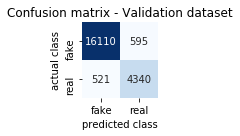

Precision =  0.9643819215803652
Recall =  0.9686729601346883
F1 Score =  0.9665226781857451
F1 % =  96.65226781857451
Error Rate =  0.05174812204395808
Accuracy =  0.9482518779560419
ROC-AUC 0.9286011644519806


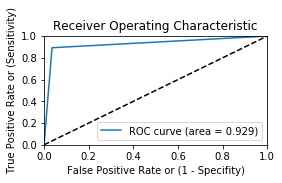

In [15]:
skf_clf1 = svm.LinearSVC() 

skf_clf1.fit(skf_count_train, skf_Y_train)                       # Fit SVM classifier according to X, y

skf_predcv = skf_clf1.predict(skf_count_test)                     # Perform classification on an array of test vectors X.

skf_cv_roc_auc = roc_auc_score(skf_Y_test, skf_predcv, average= 'micro')

#confusion matrix for count vector
skf_cm_cv = metrics.confusion_matrix(skf_Y_test, skf_predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(skf_cm_cv)

rocCurve(skf_Y_test, skf_predcv, skf_cv_roc_auc)

#Evaluation
evaluation(skf_cm_cv)

print("ROC-AUC", skf_cv_roc_auc)


C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


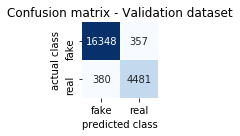

Precision =  0.9786291529482191
Recall =  0.9772835963653754
F1 Score =  0.9779559118236474
F1 % =  97.79559118236475
Error Rate =  0.034174163034406006
Accuracy =  0.965825836965594
ROC-AUC 0.9502279687802193


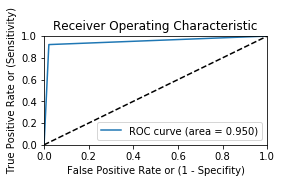

In [16]:
# print("TfIdf Vectorization")
skf_clf2 = svm.LinearSVC()

skf_clf2.fit(skf_tfidf_train, skf_Y_train)                       # Fit SVM classifier according to X, y

skf_predtf = skf_clf2.predict(skf_tfidf_test)                     # Perform classification on an array of test vectors X.

skf_tf_roc_auc = roc_auc_score(skf_Y_test, skf_predtf, average= 'micro')

#confusion matrix for count vector
skf_tf_cm = metrics.confusion_matrix(skf_Y_test, skf_predtf, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(skf_tf_cm)

rocCurve(skf_Y_test, skf_predtf, skf_tf_roc_auc)

#Evaluation
evaluation(skf_tf_cm)

print("ROC-AUC", skf_tf_roc_auc)

### Inference

###### The ROC Curve with tfidf vectorization is higher which is 0.96 hence gives an accurate prediction

We predicted that 16348 news are fake and they are fake (True Positive)

We predicted 357 news were fake but they are real (False Positive)

We predicted 380 news are real but they are fake  (False Negative)

We predicted 4481 news are real and they are real (True Negative)